In [1]:
# Importing necessary libraries and modules

import numpy as np # For numerical computations
from scipy.linalg import svd # For Singular Value Decomposition
import os # For accessing directories to read/write data.
from PIL import Image # For reading images into a numpy array
from sklearn.preprocessing import StandardScaler # For Mean Normalization and Scaling
import matplotlib.pyplot as plt # For visualizations

In [8]:
# The actual folder where the dataset is present.

IMAGE_FOLDER = 'E:/Study Material/VII-Sem-CSE/Common & Other Dep Electives/Mathematics for Data Science/Datasets/Group 12\
 Vadnere Ameya Bramhanand and Ojas Jeetendra Raundale/'

In [9]:
# Here, we read all the images present in IMAGE_FOLDER, and store those images into np arrays, which are flattened and then
# appended to X_orig_list.

X_orig_list = []

for image_name in os.listdir(IMAGE_FOLDER):
    X_orig_list.append(np.array(Image.open(os.path.join(IMAGE_FOLDER, image_name))).flatten())

In [15]:
# m and n denote the number of images (observations) and the no. of features respectively.

m, n = len(X_orig_list), X_orig_list[0].shape[0]

In [17]:
# Converting the list into np array. The shape of X_orig is (30, 4096).

X_orig = np.array(X_orig_list)

In [18]:
# Now we apply feature scaling and mean normalization to the entire array X_orig. This step should be performed before PCA.
# X is the final normalized array.

scaler = StandardScaler()
scaler.fit(X_orig)
X = scaler.transform(X_orig)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [28]:
# Verifying whether StandardScaler is working, X has near-zero mean, and std 1.

X.mean(), X.std()

(7.401486830834377e-18, 1.0)

In [29]:
# Calculating covariance matrix for PCA.

def get_covariance_matrix(X):
    
    m,n = X.shape
    CM = np.zeros((n,n))
    
    for i in range(m):
        CM += np.outer(X[i], X[i])    # Outer product. Note that this is correct only when the data is centered.
        
    return CM/(m-1)

In [31]:
CoM = get_covariance_matrix(X)
CoM.shape

(4096, 4096)

In [32]:
# Singular Value Decomposition step. We will be using the Eigenvectors obtained from U to dimensionally transform the data.
# Note that sigma is a diagonal matrix, however, the result obtained here is a vector consisting of its diagonal entries.

U, sigma, VT = svd(CoM)
U.shape, sigma.shape

((4096, 4096), (4096,))

In [48]:
# To figure out the dimensionality, we can look at explained variance ratio, which can be obtained from sigma. Here we plot 
# the explained variance ratio against the number of features selected (k).

def plot_explained_variance(sigma, start, end, thresh):
    
    ev = []
    kvals = []
    trace = sum(sigma)
    
    for k in range(start, end):
        evr = sum(sigma[:k])/trace
        ev.append(evr)
        kvals.append(k)
        if evr >= thresh:
            print("No. of features: ", k)
            break
        
    print("EVRs for various k's:\n", ev)
    
    plt.title('Explained Variance Ratio vs No. of features')
    plt.xlabel('Features')
    plt.ylabel('Explained Variance Ratio')
    plt.plot(kvals, ev)
    
    
    

No. of features:  25
EVRs for various k's:
 [0.0, 0.3042504119065732, 0.4935301647090171, 0.5826406367050684, 0.6635705920760737, 0.7087788256004101, 0.7519585439952818, 0.7869143162931455, 0.8158246510797247, 0.8402422708630151, 0.8616689179062645, 0.879866034183862, 0.8965023818911444, 0.9107202718125291, 0.9237056094460652, 0.9339723265597493, 0.9432538997647798, 0.9511022698840331, 0.9580466637792379, 0.9649057029085982, 0.9711859214953835, 0.9761202048593679, 0.9806451266012782, 0.9843717014449684, 0.9880620493433431, 0.9915590317602504]


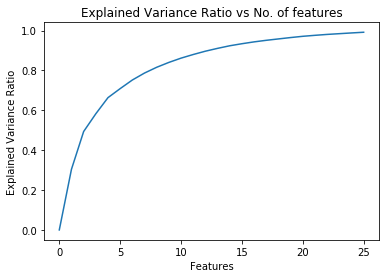

In [49]:
# We set a threshold of 99%, i.e we want to select those features which retain 99% of the variance. We observe that it is 
# reached at k = 25.

plot_explained_variance(sigma, 0, 1000, 0.99)

In [127]:
# We choose the eigenvectors for transformation now based on the value of k obtained above.

k = 25
U_red = U[:, :k]
U_red.shape

(4096, 25)

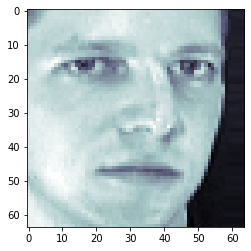

In [128]:
# We'll now take an example and reconstruct the image from k = 25 features. This is the original image.

image_index = 14
orig_image = X_orig_list[image_index].reshape(64,64)
plt.imshow(orig_image, cmap='bone')

In [129]:
# We'll transform these 4096 dimensional space into 25 dimensions/features of our choice.

transformed_vector = U_red.T.dot(X[image_index])
transformed_vector.shape

(25,)

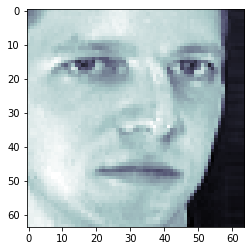

In [132]:
# Now, we reconstruct the 4096 features from our 25 selected features. Note that this is being done on centered data. We need
# to scale it back.

recon_vector = U_red.dot(transformed_vector)
recon_image = scaler.inverse_transform(recon_vector)
plt.imshow(recon_image.reshape(64, 64), cmap='bone')

In [133]:
# As can be seen, the reconstructed image is very similar to the original image. For comparison:

print(orig_image)
print(recon_image)

[[116 120 131 ...  48  47  47]
 [114 123 133 ...  55  54  54]
 [126 132 136 ...  52  53  53]
 ...
 [197 199 202 ...  37  37  37]
 [197 198 201 ...  35  35  35]
 [195 201 199 ...  39  39  39]]
[116.7409294  120.28270501 131.12393354 ...  38.09619081  37.97341197
  38.70645671]


In [134]:
# We applied the transformation over only a single image. We can do it over the entire array X as well.

transformed_X = X.dot(U_red)
recon_X = scaler.inverse_transform(transformed_X.dot(U_red.T))
recon_X.shape

(30, 4096)

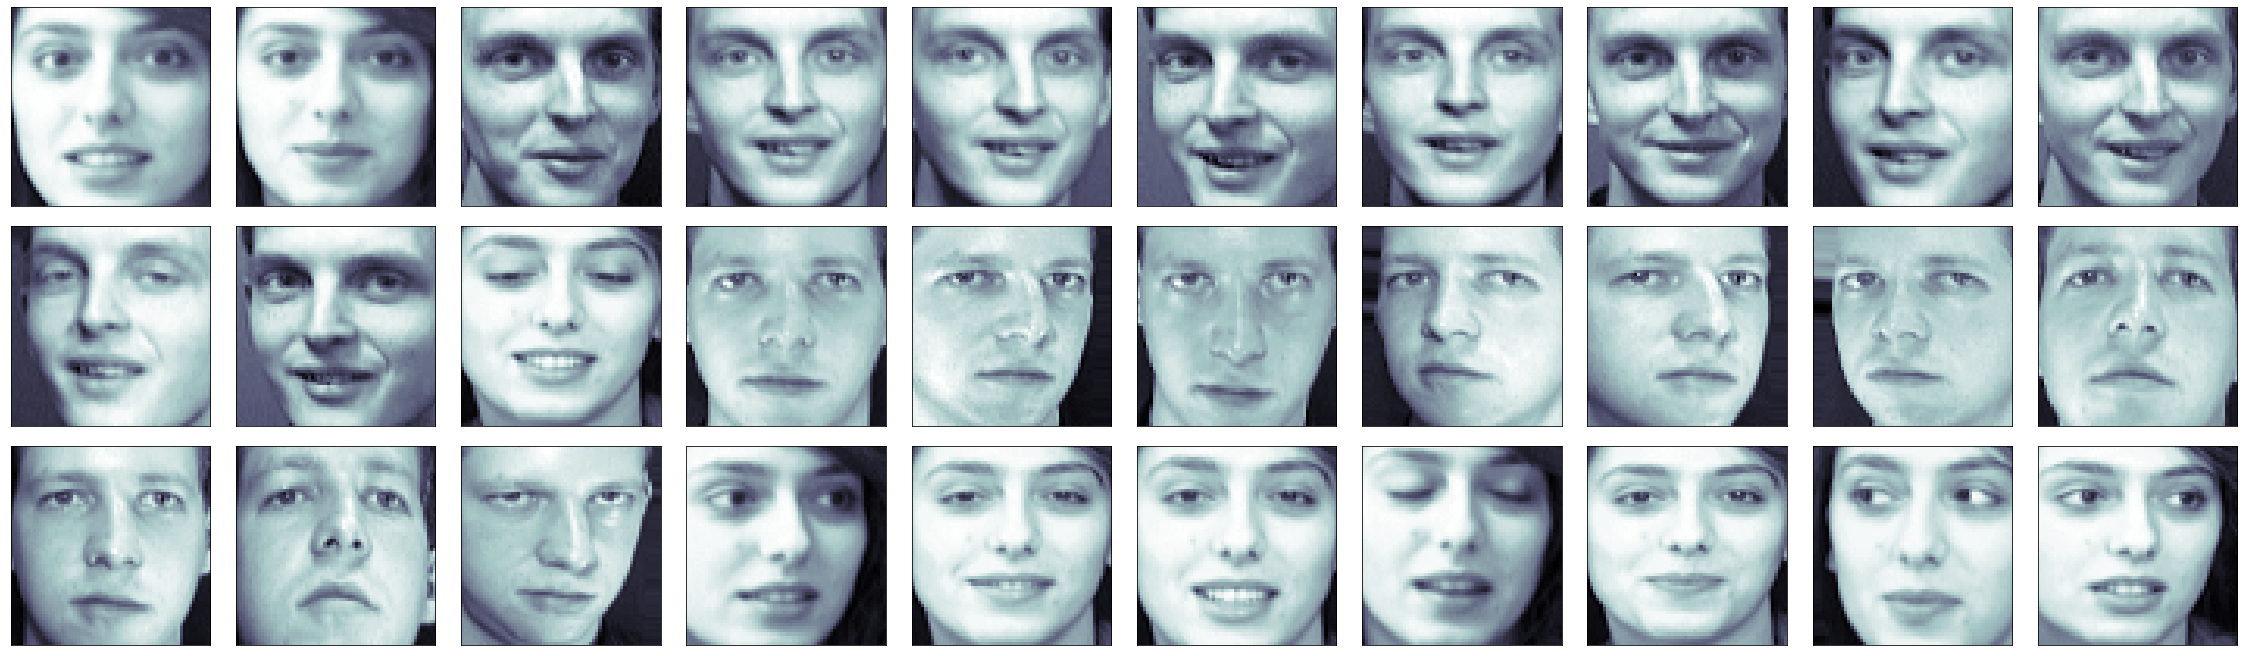

In [135]:
# We now compare all the samples.

fig = plt.figure(figsize=(40,40))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i in range(m):
    ax = fig.add_subplot(10, 10, i+1, xticks=[], yticks=[])
    ax.imshow(X_orig[i].reshape(64, 64), cmap='bone', interpolation='nearest')
    
plt.show()

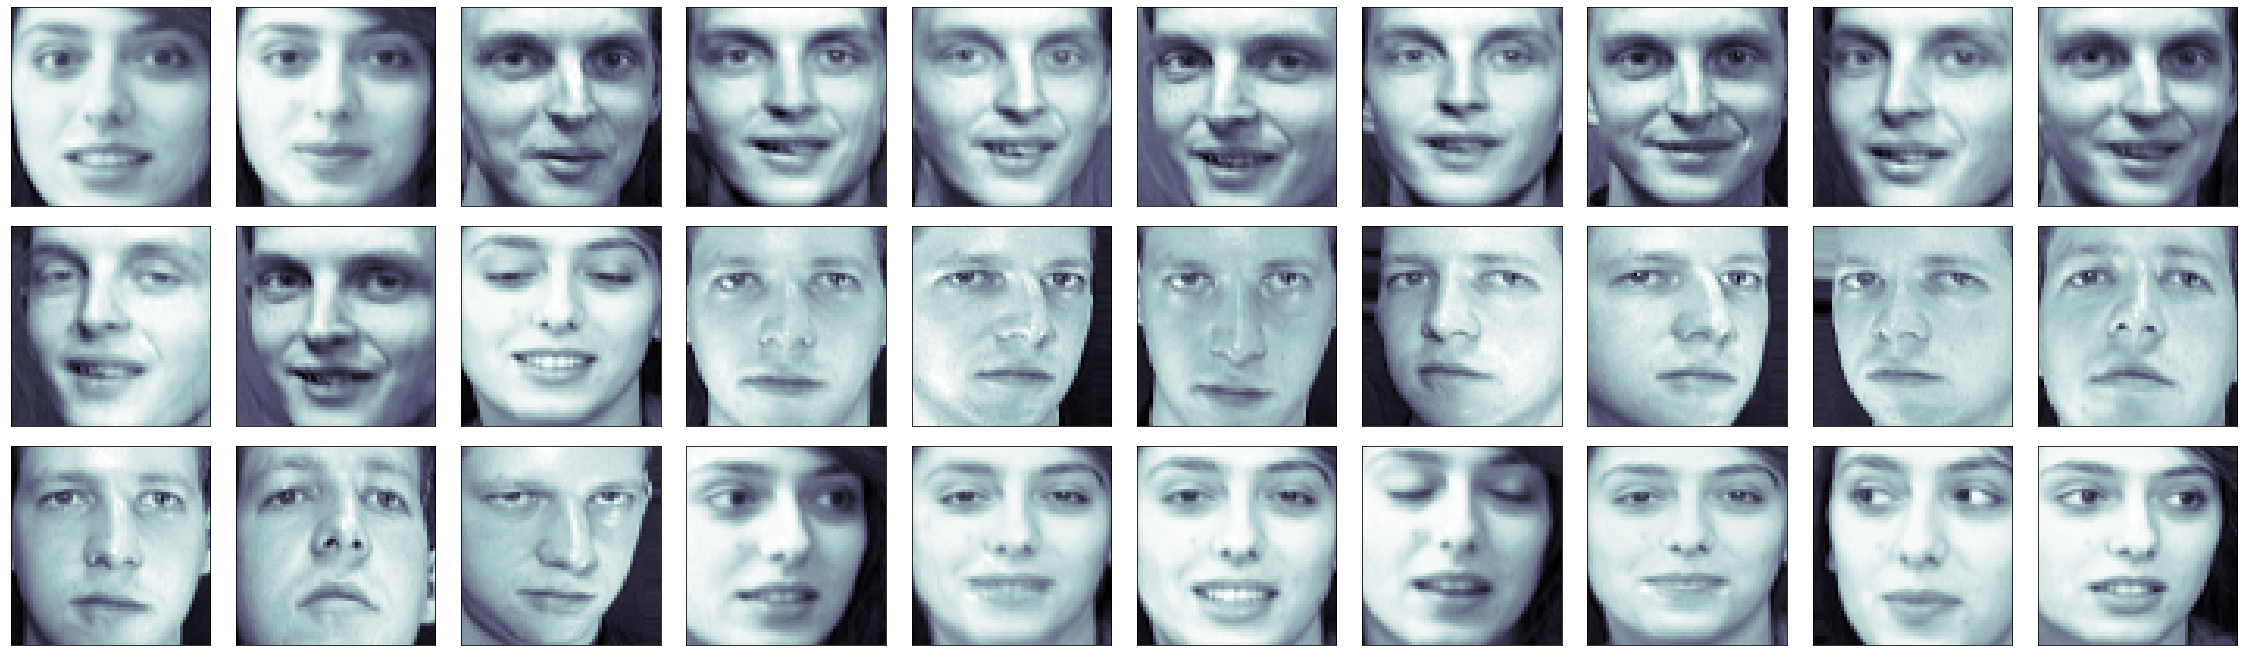

In [136]:
fig = plt.figure(figsize=(40,40))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i in range(m):
    ax = fig.add_subplot(10, 10, i+1, xticks=[], yticks=[])
    ax.imshow(recon_X[i].reshape(64, 64), cmap='bone')
    
plt.show()

In [138]:
# Just to get an idea as to how different the reconstructed matrix is from the original one, we can compute the matrix norm.

np.linalg.norm(X_orig-recon_X)

1079.490508719174

In [143]:
# The reduction from 4096 to 25 is huge. The faces are still very much discernible at this point. We can still reduce the 
# number of features to retain significant variance. We'll try with k = 8, which has EVR around 0.82.

k = 8
U_red = U[:, :k]
U_red.shape

(4096, 8)

In [144]:
transformed_X = X.dot(U_red)
recon_X = scaler.inverse_transform(transformed_X.dot(U_red.T))
recon_X.shape

(30, 4096)

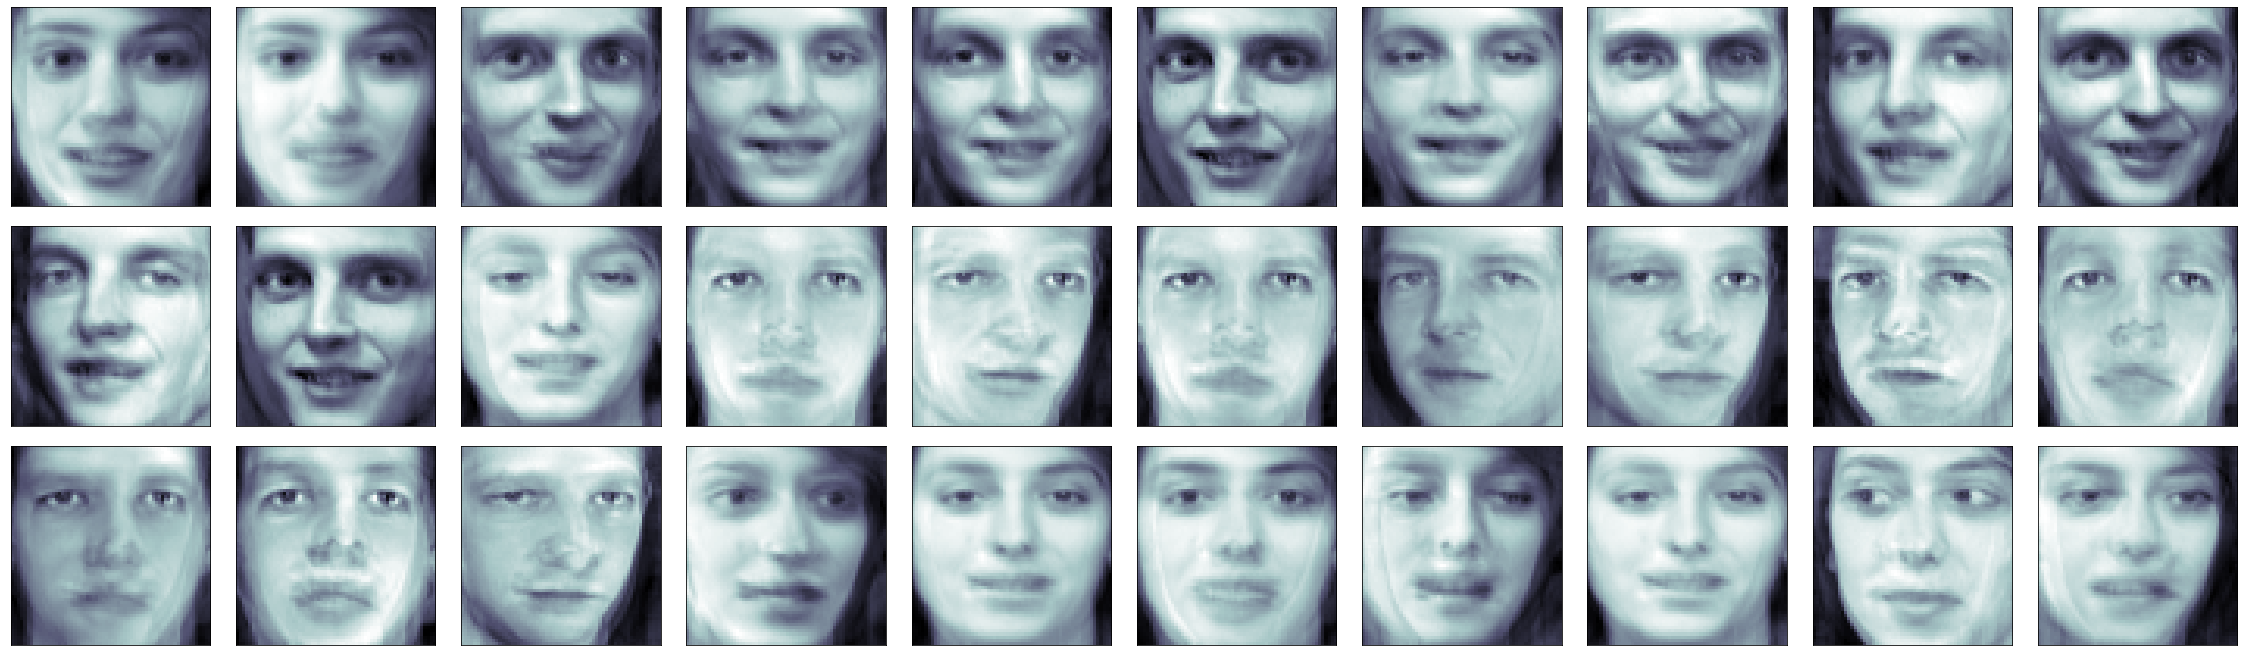

In [145]:
fig = plt.figure(figsize=(40,40))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i in range(m):
    ax = fig.add_subplot(10, 10, i+1, xticks=[], yticks=[])
    ax.imshow(recon_X[i].reshape(64, 64), cmap='bone')
plt.show()

In [146]:
np.linalg.norm(X_orig-recon_X)

5076.647734098139

In [147]:
# The faces are now clearly less recognizable, but contain sufficient information. We now try with k = 4, which has EVR = 0.663.

k = 4
U_red = U[:, :k]
U_red.shape

(4096, 4)

In [148]:
transformed_X = X.dot(U_red)
recon_X = scaler.inverse_transform(transformed_X.dot(U_red.T))
recon_X.shape

(30, 4096)

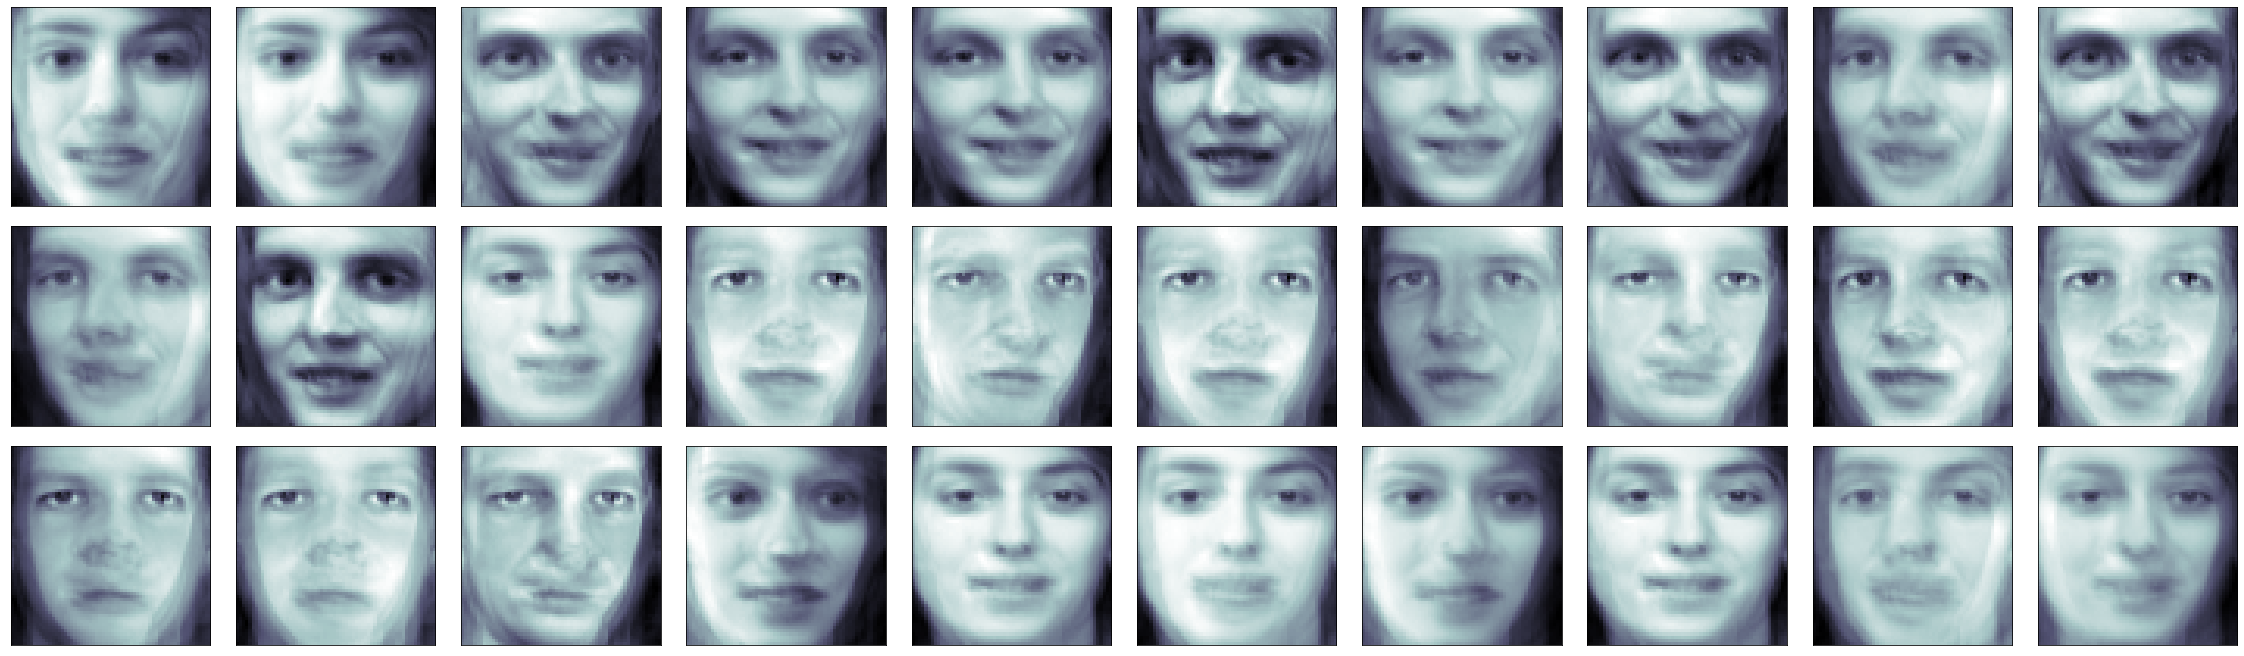

In [149]:
fig = plt.figure(figsize=(40,40))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i in range(m):
    ax = fig.add_subplot(10, 10, i+1, xticks=[], yticks=[])
    ax.imshow(recon_X[i].reshape(64, 64), cmap='bone')
    
plt.show()

In [150]:
np.linalg.norm(X_orig-recon_X)

6900.643157869777

In [151]:
# We'll also try reconstructing using all 4096 features.

k = 4096
U_red = U[:, :k]
U_red.shape

(4096, 4096)

In [152]:
transformed_X = X.dot(U_red)
recon_X = scaler.inverse_transform(transformed_X.dot(U_red.T))
recon_X.shape

(30, 4096)

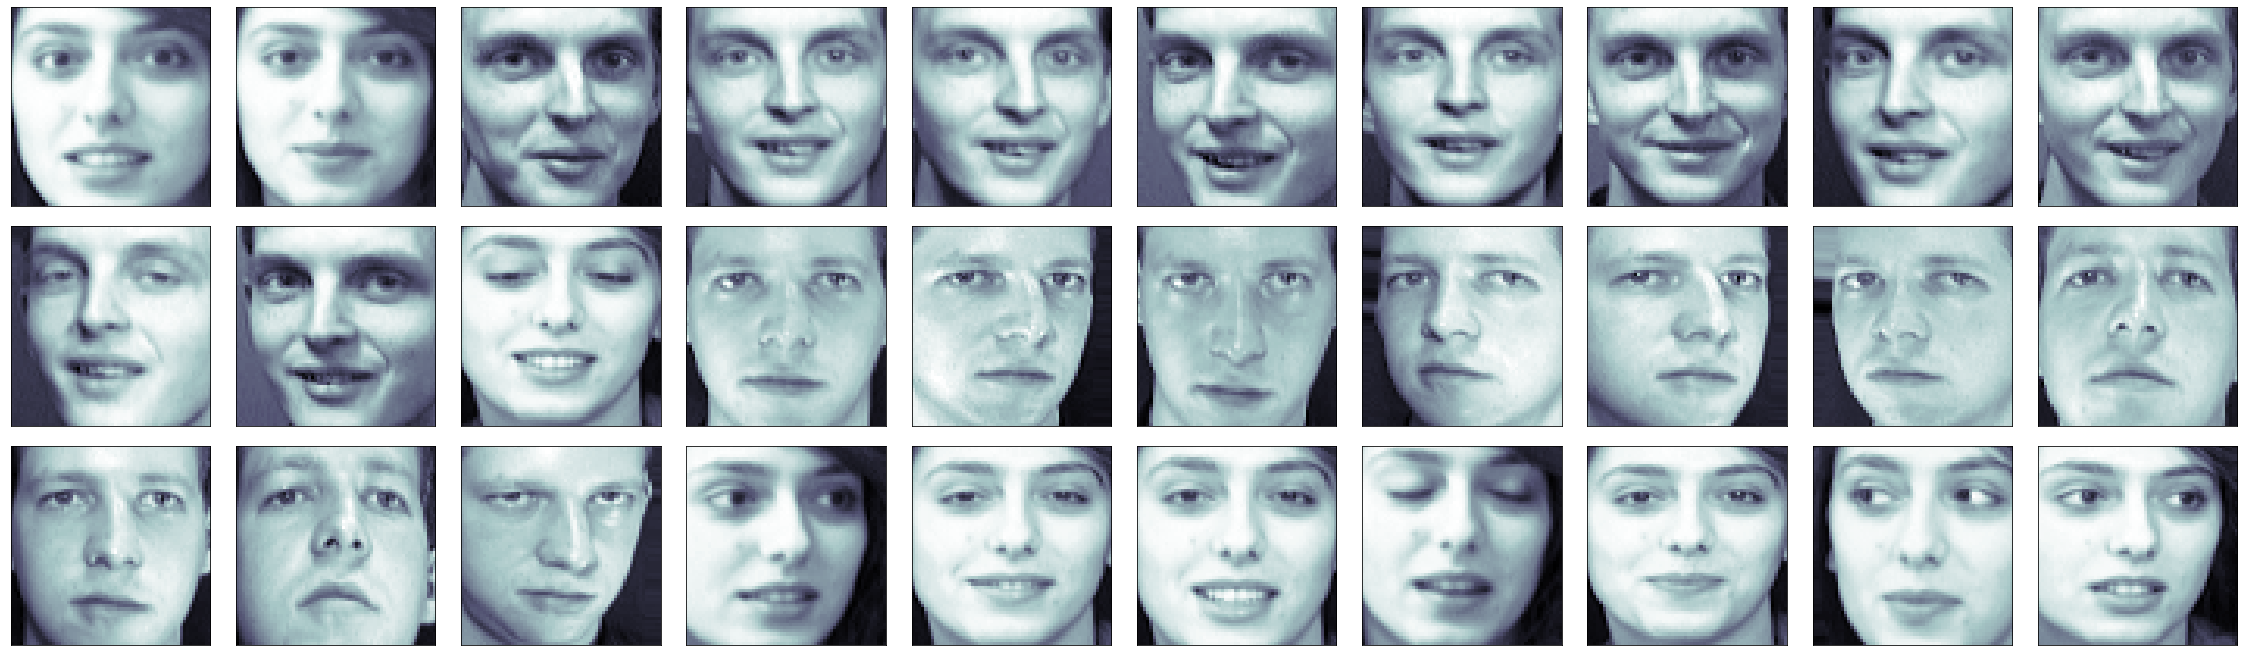

In [153]:
fig = plt.figure(figsize=(40,40))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i in range(m):
    ax = fig.add_subplot(10, 10, i+1, xticks=[], yticks=[])
    ax.imshow(recon_X[i].reshape(64, 64), cmap='bone')
    
plt.show()

In [154]:
# Observe that the matrix norms of these two matrices are very close.

np.linalg.norm(recon_X-X_orig)

3.779561823277527e-11